# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading data set

In [2]:
dataset=pd.read_csv("Student_Performance.csv")
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Extracting independent and dependent variable

In [3]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
X

array([[7, 99, 'Yes', 9, 1],
       [4, 82, 'No', 4, 2],
       [8, 51, 'Yes', 7, 2],
       ...,
       [6, 83, 'Yes', 8, 5],
       [9, 97, 'Yes', 7, 0],
       [7, 74, 'No', 8, 1]], dtype=object)

In [5]:
y

array([91., 65., 45., ..., 74., 95., 64.])

# Handling/Checking Missing values

In [6]:
missing_values=dataset.isna()
missing_values

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


# Encoding the categorical data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[2])],remainder="passthrough")
X=np.array(ct.fit_transform(X))

In [10]:
X

array([[0.0, 1.0, 7, 99, 9, 1],
       [1.0, 0.0, 4, 82, 4, 2],
       [0.0, 1.0, 8, 51, 7, 2],
       ...,
       [0.0, 1.0, 6, 83, 8, 5],
       [0.0, 1.0, 9, 97, 7, 0],
       [1.0, 0.0, 7, 74, 8, 1]], dtype=object)

In [11]:
y

array([91., 65., 45., ..., 74., 95., 64.])

# Splitting the training and test dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [13]:
X_train

array([[1.0, 0.0, 3, 64, 5, 1],
       [0.0, 1.0, 2, 66, 5, 6],
       [1.0, 0.0, 3, 91, 5, 1],
       ...,
       [1.0, 0.0, 8, 93, 9, 0],
       [1.0, 0.0, 3, 98, 7, 2],
       [0.0, 1.0, 3, 54, 6, 3]], dtype=object)

In [14]:
X_test

array([[1.0, 0.0, 6, 73, 7, 2],
       [0.0, 1.0, 1, 89, 7, 2],
       [0.0, 1.0, 3, 97, 8, 0],
       ...,
       [1.0, 0.0, 3, 84, 9, 0],
       [1.0, 0.0, 5, 45, 7, 2],
       [0.0, 1.0, 1, 56, 8, 5]], dtype=object)

In [15]:
y_train

array([42., 42., 69., ..., 85., 76., 38.])

In [16]:
y_test

array([58., 64., 75., ..., 67., 33., 33.])

# Performing EDA

In [20]:
# describing the data

In [21]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


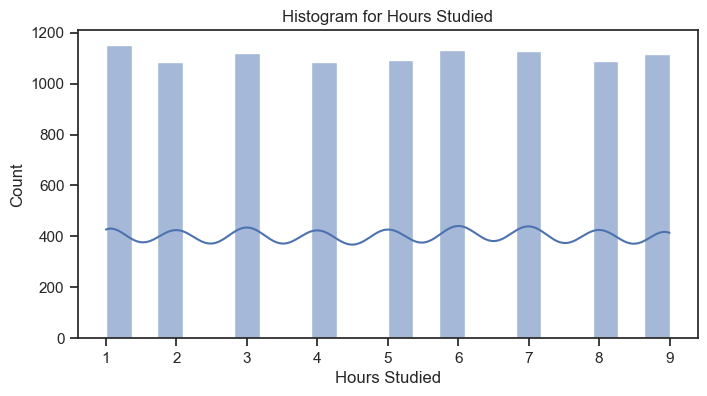

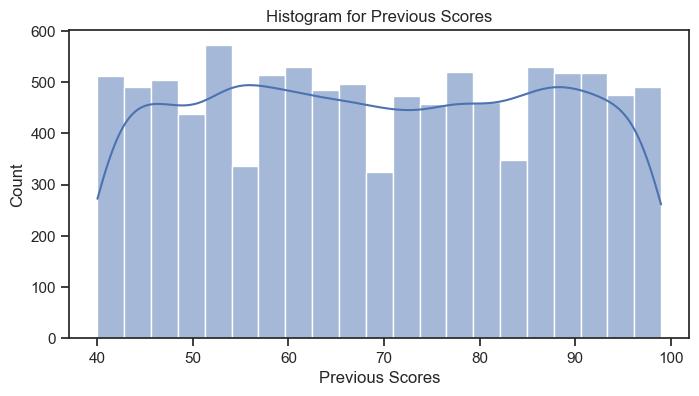

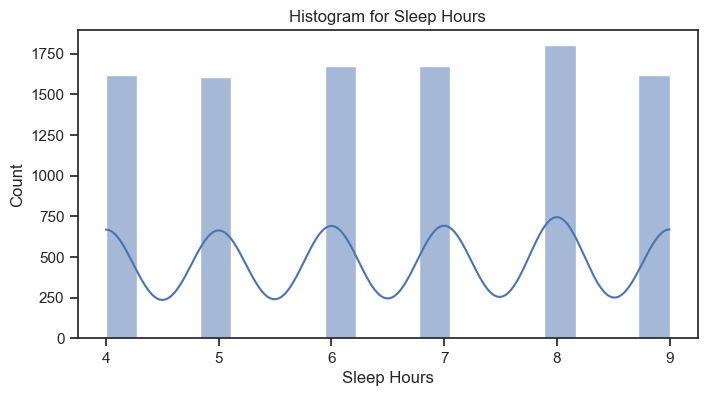

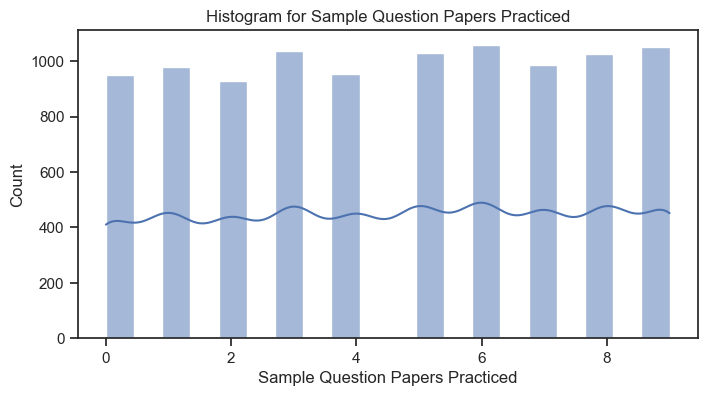

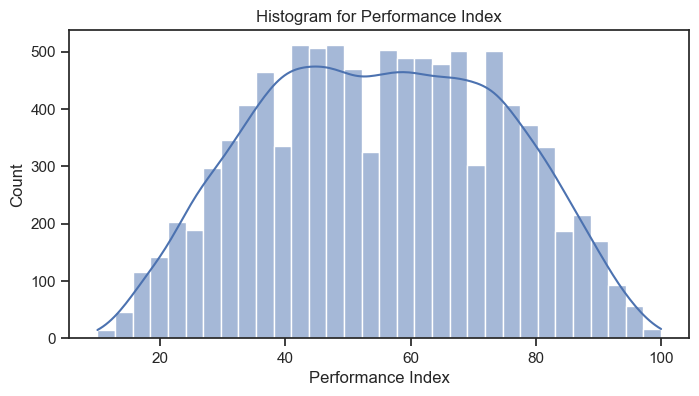

In [27]:
numerical_variables = dataset.select_dtypes(include=['float64', 'int64']).columns

for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[var], kde=True)
    plt.title(f'Histogram for {var}')
    plt.show()

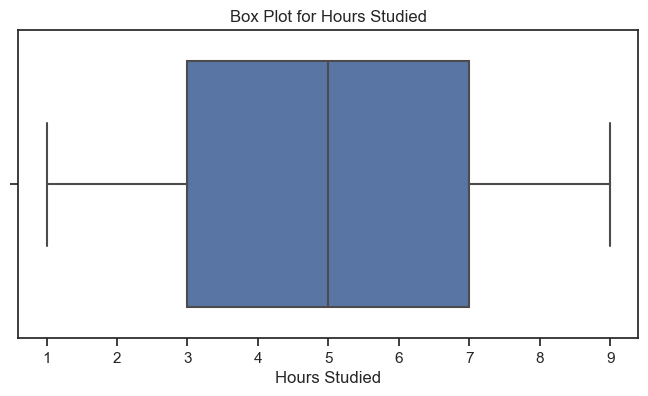

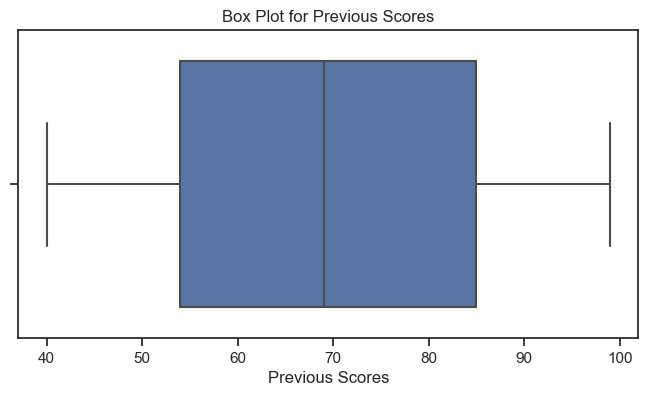

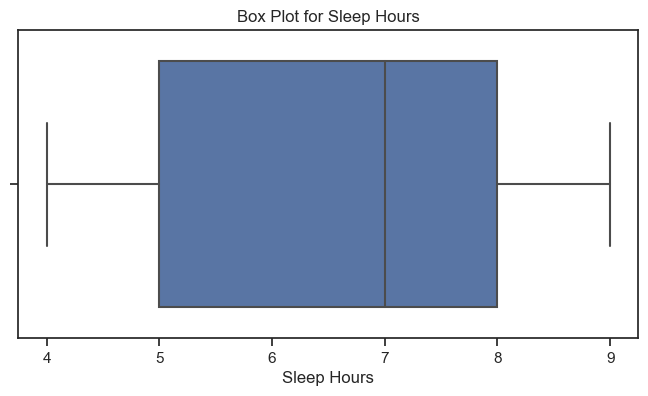

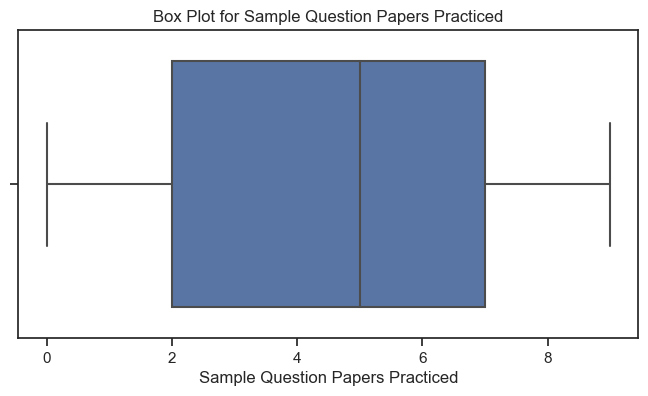

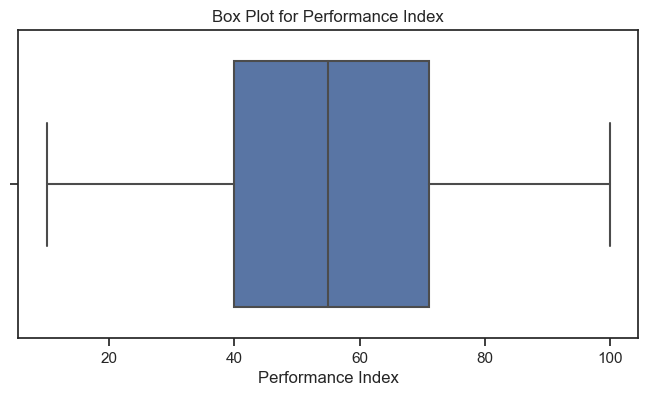

In [28]:
for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[var])
    plt.title(f'Box Plot for {var}')
    plt.show()

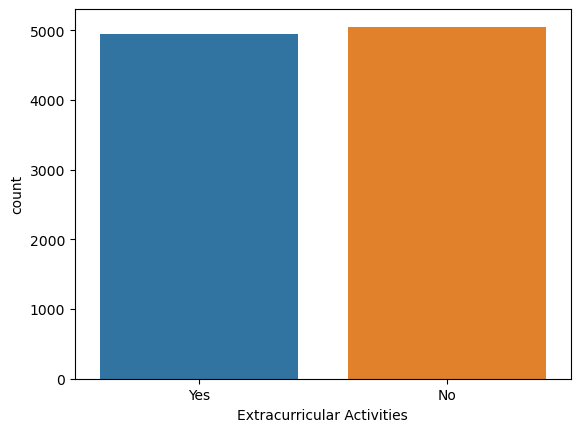

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Extracurricular Activities', data=dataset)
plt.show()

/var/folders/5x/7cgxntk15v7d4vjry7cgwd400000gn/T/ipykernel_2032/2587750426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


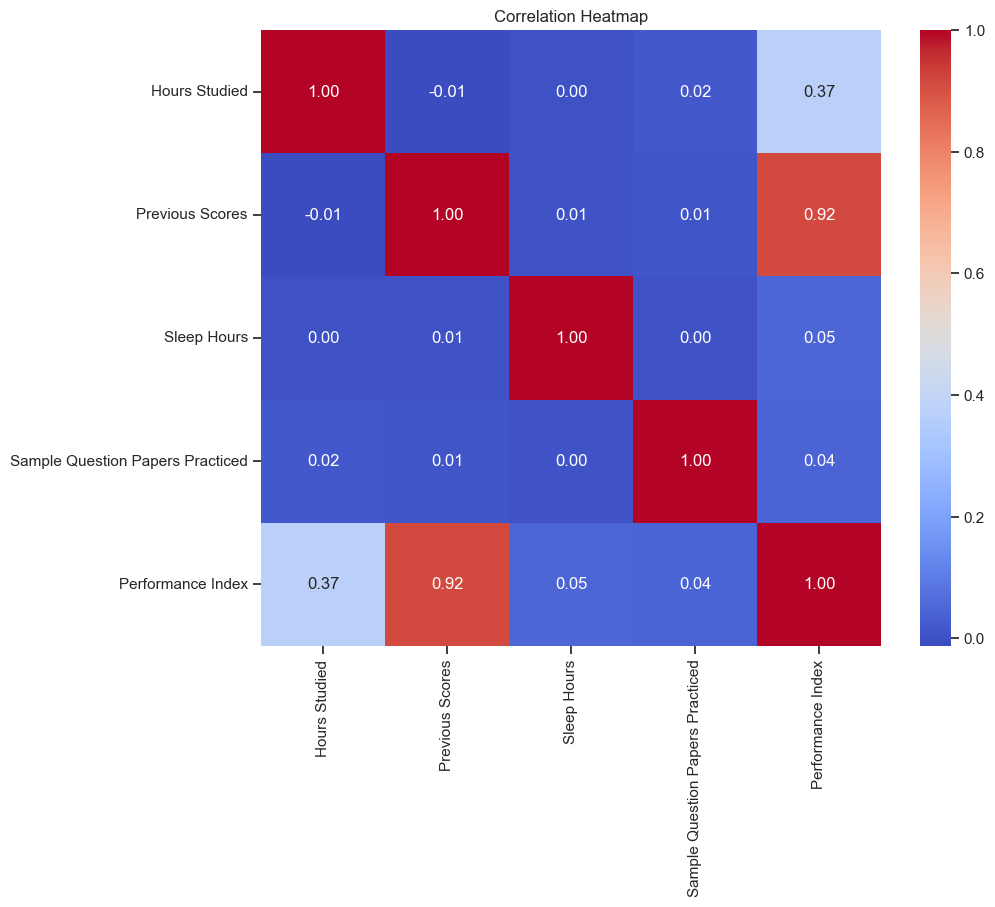

In [29]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


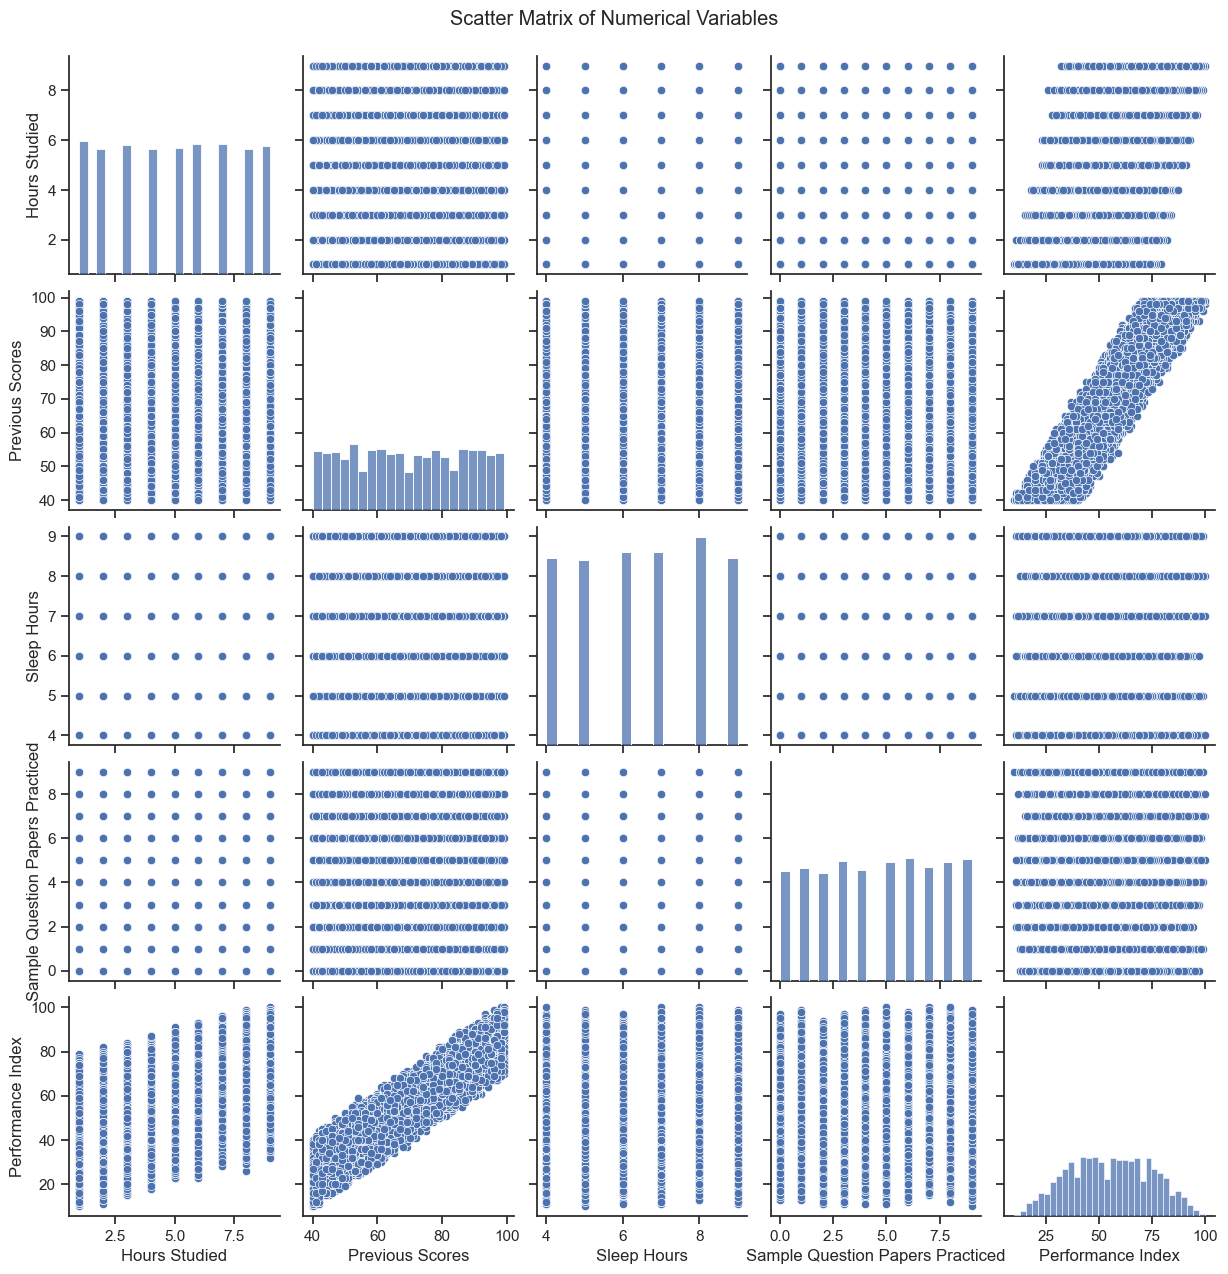

In [26]:
sns.set(style="ticks")
sns.pairplot(dataset)
plt.suptitle('Scatter Matrix of Numerical Variables', y=1.02)
plt.show()


# Making Multiple Regression model

In [19]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[61.178 58.   ]
 [63.795 64.   ]
 [77.758 75.   ]
 ...
 [64.396 67.   ]
 [29.79  33.   ]
 [31.209 33.   ]]
